<a href="https://colab.research.google.com/github/manas0512/TCET_Project/blob/main/Mumbai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Mumbai1.csv")

In [ ]:
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [ ]:
data.shape

(6347, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

In [ ]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*20)

0       1
4239    1
4237    1
4236    1
4235    1
       ..
2113    1
2112    1
2111    1
2110    1
6346    1
Name: Unnamed: 0, Length: 6347, dtype: int64
********************
8500000     116
9000000      93
7500000      92
4500000      88
9500000      88
           ... 
52600000      1
5686000       1
7881000       1
2770000       1
2465000       1
Name: Price, Length: 979, dtype: int64
********************
650     263
1050    146
600     141
1100    138
1000     98
       ... 
1487      1
1558      1
793       1
596       1
435       1
Name: Area, Length: 1140, dtype: int64
********************
Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 413, dtype: int64
********************
2    2601
1    2307
3    1201
4     190
5      39
6       

In [ ]:
data.isna().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [ ]:
data.drop(columns=['Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security', "Children's Play Area", "Clubhouse", "Intercom", "Landscaped Gardens", "Indoor Games", "Gas Connection", "Jogging Track", "Swimming Pool"], inplace=True)

In [ ]:
data.shape

(6347, 6)

In [ ]:
data.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       6347 non-null   int64 
 1   Price            6347 non-null   int64 
 2   Area             6347 non-null   int64 
 3   Location         6347 non-null   object
 4   No. of Bedrooms  6347 non-null   int64 
 5   New/Resale       6347 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 297.6+ KB


In [ ]:
data['price_per_sqft'] = data['Price'] / data['Area']

In [ ]:
data['price_per_sqft']

0        6736.111111
1        7500.000000
2       10307.692308
3        6923.076923
4        7518.796992
            ...     
6342     3550.000000
6343    16111.111111
6344    16111.111111
6345     2971.014493
6346     3928.571429
Name: price_per_sqft, Length: 6347, dtype: float64

In [ ]:
data['Location']

0            Kharghar
1            Kharghar
2            Kharghar
3            Kharghar
4            Kharghar
            ...      
6342         Shirgaon
6343       Thane West
6344       Thane West
6345           Boisar
6346    Badlapur East
Name: Location, Length: 6347, dtype: object

In [ ]:
data['Location'] = data['Location'].apply(lambda x: x.strip())
location_count = data['Location'].value_counts()

In [ ]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

Sector 19 Kharghar    10
Sion                  10
Majiwada              10
Sector12 Kamothe       9
kandivali              9
                      ..
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 324, dtype: int64

In [ ]:
data['Location'] = data['Location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [ ]:
data['Location'].value_counts()

other             808
Kharghar          533
Thane West        418
Mira Road East    390
Ulwe              319
                 ... 
Vashi              12
matunga east       12
Kalyan East        11
Palghar            11
Kurla West         11
Name: Location, Length: 90, dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,price_per_sqft
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,13555.465839
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,9573.921483
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,1597.444089
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,7234.042553
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,10493.827160
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,17142.857143
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,109950.522265


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6347 non-null   int64  
 1   Price            6347 non-null   int64  
 2   Area             6347 non-null   int64  
 3   Location         6347 non-null   object 
 4   No. of Bedrooms  6347 non-null   int64  
 5   New/Resale       6347 non-null   int64  
 6   price_per_sqft   6347 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 347.2+ KB


In [ ]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()
  for key, subdf in df.groupby('Location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    
    gen_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m+st))]
    df_output = pd.concat([df_output, gen_df], ignore_index = True)
  return df_output
data = remove_outliers_sqft(data)
data.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,price_per_sqft
count,4922.000000,4.922000e+03,4922.000000,4922.000000,4922.000000,4922.000000
mean,3153.062373,1.314812e+07,993.934173,1.854328,0.321008,12183.266919
std,1836.880233,1.443915e+07,521.370099,0.825394,0.466911,7351.799480
min,1.000000,2.000000e+06,200.000000,1.000000,0.000000,2222.222222
25%,1534.250000,5.300000e+06,650.000000,1.000000,0.000000,7175.375831
50%,3173.500000,9.000000e+06,910.000000,2.000000,0.000000,9703.687445
75%,4743.750000,1.600000e+07,1160.000000,2.000000,1.000000,16190.476190
max,6346.000000,2.300000e+08,7600.000000,7.000000,1.000000,55813.953488


In [ ]:
data.shape

(4922, 7)

In [ ]:
data.drop(columns=['price_per_sqft','New/Resale', 'Unnamed: 0'], inplace=True)

In [ ]:
data.head()

,Price,Area,Location,No. of Bedrooms
0,6200000,400,Airoli,1
1,9500000,1000,Airoli,2
2,14900000,1245,Airoli,2
3,14000000,1183,Airoli,2
4,14800000,1245,Airoli,2


In [ ]:
data.to_csv('/content/drive/MyDrive/Cleaned_data.csv')

In [ ]:
X = data.drop(columns=['Price'])
y = data['Price']
print(X)
print(y)

      Area Location  No. of Bedrooms
0      400   Airoli                1
1     1000   Airoli                2
2     1245   Airoli                2
3     1183   Airoli                2
4     1245   Airoli                2
...    ...      ...              ...
4917   325    other                1
4918   695    other                1
4919   650    other                1
4920   700    other                1
4921   700    other                1

[4922 rows x 3 columns]
0        6200000
1        9500000
2       14900000
3       14000000
4       14800000
          ...   
4917     4500000
4918     4260000
4919     3500000
4920     2465000
4921     2485000
Name: Price, Length: 4922, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


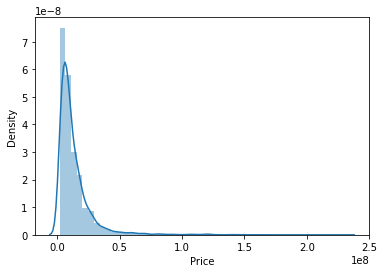

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y)
plt.show()

In [ ]:
y.skew()

4.831290169159669

In [ ]:
from scipy import stats
y=stats.boxcox(y)[0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


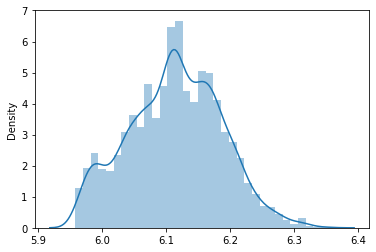

In [ ]:
sns.distplot(y)
plt.show()

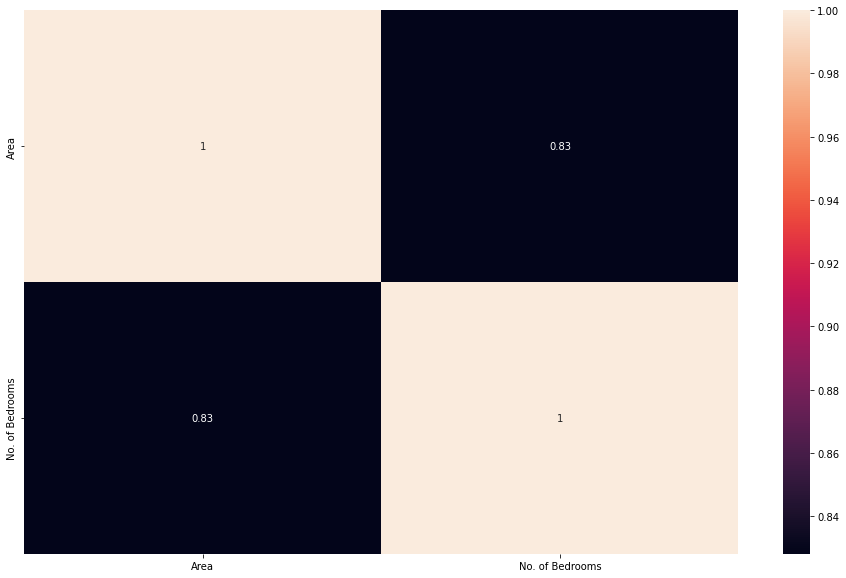

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

In [ ]:
nX = data.drop(columns=['Location'])
mean_area = nX['Area'].mean()
mean_nobedrooms = nX['No. of Bedrooms'].mean()
print('mean_area is ', mean_area)
print('mean_nobedrooms is ', mean_nobedrooms)

X_meaned = nX - np.mean(nX, axis=0)
print(X_meaned)

mean_area is  993.9341731003657
mean_nobedrooms is  1.854327509142625
             Price        Area  No. of Bedrooms
0    -6.948119e+06 -593.934173        -0.854328
1    -3.648119e+06    6.065827         0.145672
2     1.751881e+06  251.065827         0.145672
3     8.518806e+05  189.065827         0.145672
4     1.651881e+06  251.065827         0.145672
...            ...         ...              ...
4917 -8.648119e+06 -668.934173        -0.854328
4918 -8.888119e+06 -298.934173        -0.854328
4919 -9.648119e+06 -343.934173        -0.854328
4920 -1.068312e+07 -293.934173        -0.854328
4921 -1.066312e+07 -293.934173        -0.854328

[4922 rows x 3 columns]


In [ ]:
cov_mat = np.cov(X_meaned, rowvar = False)
print(cov_mat)

[[2.08489197e+14 5.71052097e+09 7.42080667e+06]
 [5.71052097e+09 2.71826780e+05 3.56354563e+02]
 [7.42080667e+06 3.56354563e+02 6.81274705e-01]]


In [ ]:
eigen_values,eigen_vectors = np.linalg.eigh(cov_mat)
print(eigen_values,eigen_vectors)

[2.14058642e-01 1.15415763e+05 2.08489197e+14] [[-7.39637538e-10 -2.73900321e-05  1.00000000e+00]
 [ 1.32650009e-03  9.99999120e-01  2.73900090e-05]
 [-9.99999120e-01  1.32650009e-03  3.55932431e-08]]


In [ ]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
print(sorted_eigenvalue)

[2.08489197e+14 1.15415763e+05 2.14058642e-01]


In [ ]:
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print(sorted_eigenvectors)

[[ 1.00000000e+00 -2.73900321e-05 -7.39637538e-10]
 [ 2.73900090e-05  9.99999120e-01  1.32650009e-03]
 [ 3.55932431e-08  1.32650009e-03 -9.99999120e-01]]


In [ ]:
n_components = 1
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print(eigenvector_subset)

[[1.00000000e+00]
 [2.73900090e-05]
 [3.55932431e-08]]


In [ ]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[ -6948119.45880586]
 [ -3648119.44360967]
 [  1751880.56107531]
 ...
 [ -9648119.45094556]
 [-10683119.44918783]
 [-10663119.44919533]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3937, 3)
(985, 3)


#**Applying Linear Regression**

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['Location']),remainder='passthrough')

In [ ]:
scaler = StandardScaler()

In [ ]:
lr = LinearRegression(normalize = True)

In [ ]:
pipe = make_pipeline(column_trans, scaler, lr)

In [ ]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [ ]:
y_pred_lr = pipe.predict(X_test)

In [ ]:
res = {
  "test": y_test,
  "pred": y_pred_lr
}
res = pd.DataFrame(res)
print(res)

         test      pred
0    6.235352  6.238686
1    6.049474  6.030284
2    6.020815  6.034491
3    6.163696  6.159180
4    6.014753  5.962743
..        ...       ...
980  6.133507  6.134503
981  6.118655  6.103513
982  6.049474  6.058699
983  6.113022  6.107299
984  5.964580  6.070662

[985 rows x 2 columns]


In [ ]:
r2_score(y_test, y_pred_lr)

0.8726156828805278





#**Applying KNN**

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)


In [ ]:
pipe = make_pipeline(column_trans, scaler, knn)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
y_pred_knn = pipe.predict(X_test)

In [ ]:
res = {
  "test": y_test,
  "pred": y_pred_knn
}
res = pd.DataFrame(res)
print(res)

         test      pred
0    6.235352  6.238763
1    6.049474  6.055231
2    6.020815  6.024145
3    6.163696  6.157609
4    6.014753  5.976193
..        ...       ...
980  6.133507  6.124576
981  6.118655  6.113126
982  6.049474  6.061302
983  6.113022  6.099188
984  5.964580  6.064636

[985 rows x 2 columns]


In [ ]:
r2_score(y_test, y_pred_knn)

0.888451943457347

#**Applying Decision Tree**

In [ ]:
tr_regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
pipe = make_pipeline(column_trans, scaler, tr_regressor)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [ ]:
y_pred_decision = pipe.predict(X_test)
r2_score(y_test, y_pred_decision)

0.841019231245745

In [ ]:
res = {
  "test": y_test,
  "pred": y_pred_decision
}
res = pd.DataFrame(res)
print(res)

         test      pred
0    6.235352  6.233742
1    6.049474  6.055935
2    6.020815  6.037523
3    6.163696  6.151719
4    6.014753  6.016626
..        ...       ...
980  6.133507  6.129213
981  6.118655  6.121556
982  6.049474  6.062496
983  6.113022  6.014818
984  5.964580  6.082770

[985 rows x 2 columns]


#**Applying Logistic Regression**




In [ ]:
logisticR = LogisticRegression(random_state=0)

In [ ]:
pipe = make_pipeline(column_trans, scaler, tr_regressor)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [ ]:
y_pred_decision = pipe.predict(X_test)
r2_score(y_test, y_pred_decision)

0.841019231245745

In [ ]:
res = {
  "test": y_test,
  "pred": y_pred_decision
}
res = pd.DataFrame(res)
print(res)

         test      pred
0    6.235352  6.233742
1    6.049474  6.055935
2    6.020815  6.037523
3    6.163696  6.151719
4    6.014753  6.016626
..        ...       ...
980  6.133507  6.129213
981  6.118655  6.121556
982  6.049474  6.062496
983  6.113022  6.014818
984  5.964580  6.082770

[985 rows x 2 columns]


#**Applying Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
pipe = make_pipeline(column_trans, scaler, tr_regressor)

In [ ]:
pipe.fit(X_train, y_train,)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [ ]:
y_pred_decision = pipe.predict(X_test)
r2_score(y_test, y_pred_decision)

0.841019231245745

In [ ]:
res = {
  "test": y_test,
  "pred": y_pred_decision
}
res = pd.DataFrame(res)
print(res)

         test      pred
0    6.235352  6.233742
1    6.049474  6.055935
2    6.020815  6.037523
3    6.163696  6.151719
4    6.014753  6.016626
..        ...       ...
980  6.133507  6.129213
981  6.118655  6.121556
982  6.049474  6.062496
983  6.113022  6.014818
984  5.964580  6.082770

[985 rows x 2 columns]


#**Applying Lasso**

In [ ]:
lasso = Lasso()

In [ ]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [ ]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

-0.0024717220754220115

#**Applying Ridge**

In [ ]:
ridge = Ridge()

In [ ]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.8725636880053342

In [ ]:
  print("No Regularization: ", r2_score(y_test, y_pred_lr))
  print("Lasso: ", r2_score(y_test, y_pred_lasso))
  print("Ridge: ", r2_score(y_test, y_pred_ridge))

No Regularization:  0.8726156828805278
Lasso:  -0.0024717220754220115
Ridge:  0.8725636880053342


In [ ]:
import pickle

In [ ]:
pickle.dump(pipe, open('/content/drive/MyDrive/RidgeModel.pkl','wb'))